In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
import librosa, IPython
import librosa.display as lplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

In [99]:
df = pd.read_csv('./Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

blues        1000
metal        1000
reggae       1000
pop          1000
jazz         1000
disco         999
rock          998
classical     998
hiphop        998
country       997
Name: label, dtype: int64

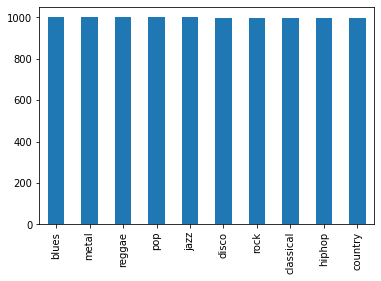

In [101]:
df['label'].value_counts().plot(kind='bar')

df['label'].value_counts()

In [102]:
file_path = './Data/genres_original/blues/blues.00000.wav'

In [103]:
audio_data, sr = librosa.load(file_path)

In [104]:
IPython.display.Audio(audio_data, rate=sr)

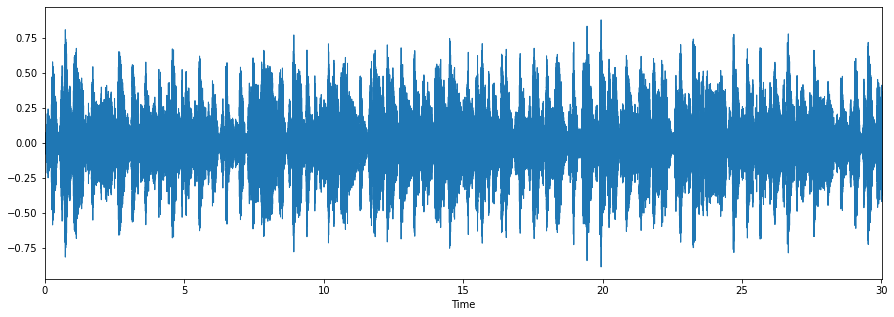

In [105]:
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()

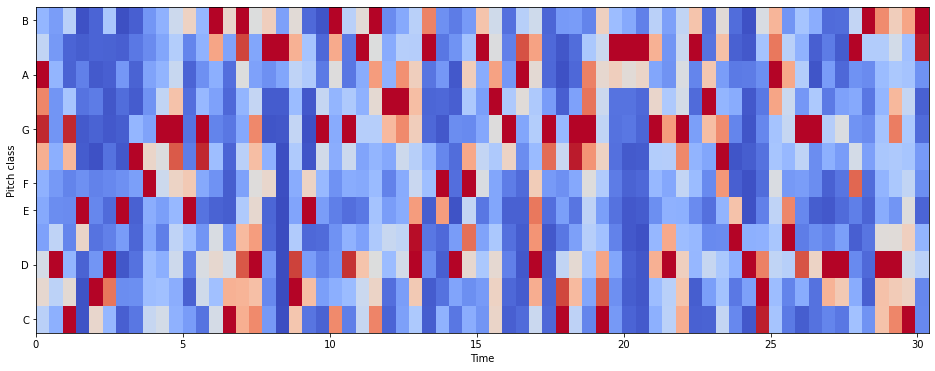

In [106]:
chromagram = librosa.feature.chroma_stft(audio_data, sr=sr, hop_length=10000)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=10000, cmap='coolwarm');

In [107]:
rms = librosa.feature.rms(y=audio_data)

In [108]:
rms

array([[0.02698701, 0.03934191, 0.0497628 , ..., 0.1405525 , 0.13533325,
        0.14893965]], dtype=float32)

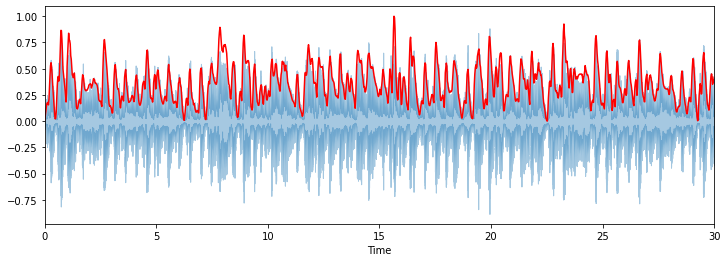

In [109]:
frames = range(len(rms[0]))
t = librosa.frames_to_time(frames)

# 같은 창에서 그래프를 출력하기 위해서 정규화
def normalize(Signal, axis=0):
    return minmax_scale(Signal, axis=axis)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(rms[0]), color='r')

In [110]:
spectral_centroids = librosa.feature.spectral_centroid(audio_data+0.01, sr=sr)[0]

In [111]:
spectral_centroids

array([2201.39978008, 2069.72216858, 1921.76768342, ..., 1470.22965083,
       1492.58457359, 1454.31699863])

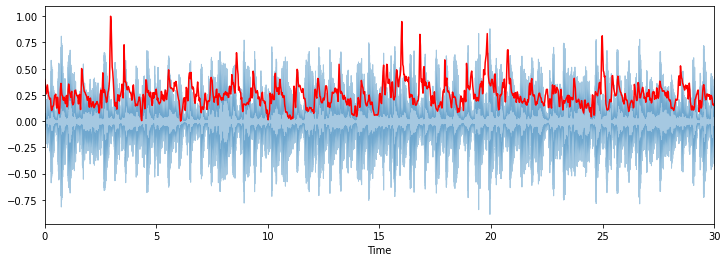

In [112]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

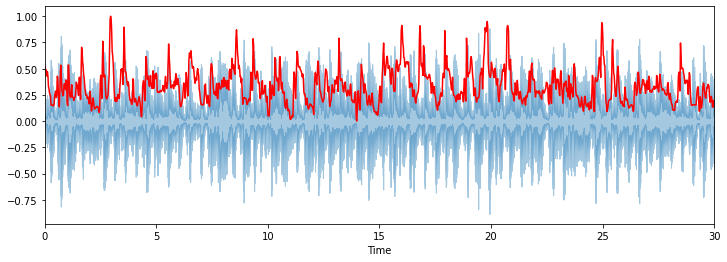

In [113]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

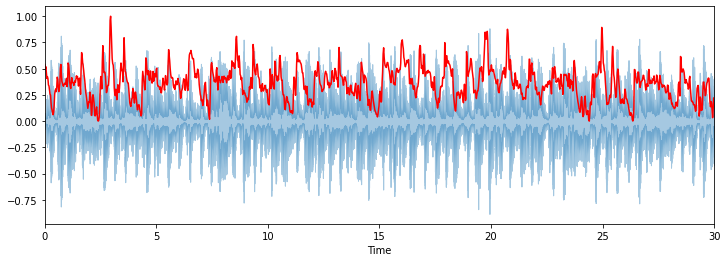

In [114]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(audio_data+0.01, sr=sr)[0]

plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')

In [115]:
zero_crossings_rate = librosa.feature.zero_crossing_rate(audio_data)

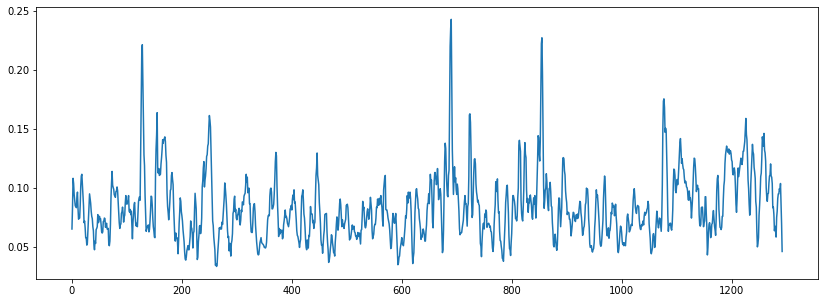

In [116]:
plt.figure(figsize=(14, 5))
plt.plot(zero_crossings_rate[0])

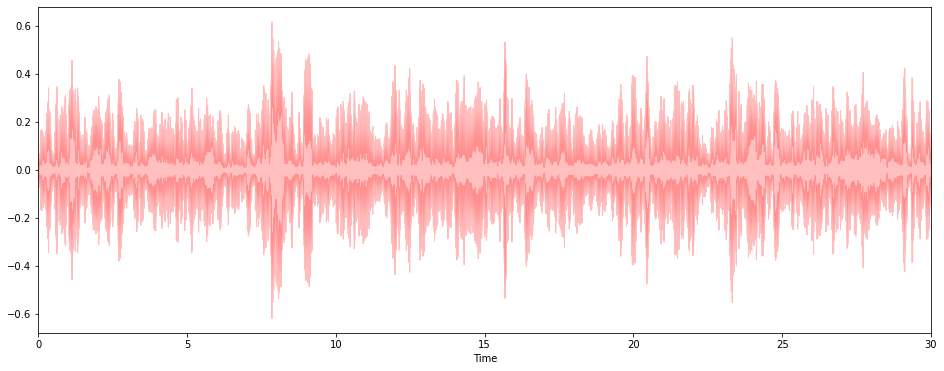

In [117]:
y_harm, y_perc = librosa.effects.hpss(audio_data)
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y_harm, sr=sr, color="r", alpha=0.25);

In [118]:
tempo = librosa.beat.tempo(y=audio_data, sr=sr)
print(tempo)

[123.046875]


In [119]:
S = librosa.feature.melspectrogram(audio_data, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=20)

In [120]:
mfcc.shape

(20, 1293)

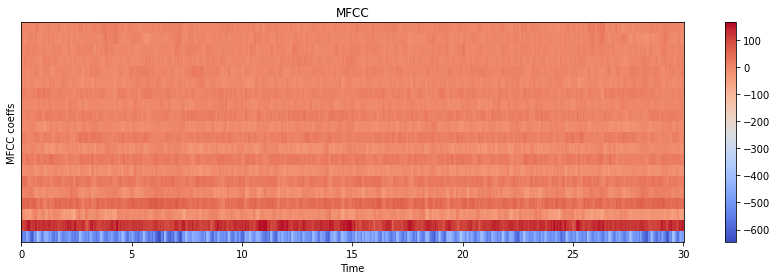

In [121]:
plt.figure(figsize=(12, 4))
lplt.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [122]:
df = df.replace(['pop','blues','jazz','metal','reggae','disco','hiphop','classical','rock','country'],[0,1,2,3,4,5,6,7,8,9])

In [123]:
df.drop(['filename', 'length'], axis=1, inplace=True)
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,1
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,1
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,1
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,1
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,8
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,8
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,8
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,8


In [124]:
df_label = df.pop('label')
df_label

0       1
1       1
2       1
3       1
4       1
       ..
9985    8
9986    8
9987    8
9988    8
9989    8
Name: label, Length: 9990, dtype: int64

In [125]:
df1 = pd.read_csv('./score.csv')


In [126]:

df_feature = df
df_feature

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [127]:
df_label

0       1
1       1
2       1
3       1
4       1
       ..
9985    8
9986    8
9987    8
9988    8
9989    8
Name: label, Length: 9990, dtype: int64

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label, train_size=0.75)
X_test1 = df1
# X_test
X_test1

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.421312,0.300363,-1.083016,-0.575785,0.422297,0.278343,0.644513,-0.074880,0.686791,-0.011986,...,0.677170,-0.737792,-1.506011,-0.432144,-0.704670,-0.314238,-1.667335,-0.538753,0.040908,-0.429300
1,0.442187,1.178205,1.070326,2.740064,2.593804,1.490674,2.156102,-0.246997,2.375726,-0.035419,...,-1.633087,1.326801,0.195039,0.692306,-0.579453,0.964227,-0.174356,1.391162,-0.346156,1.520614
2,-0.479077,1.400121,2.503544,0.995893,2.043877,2.276640,2.003976,-0.054045,2.115821,0.576785,...,-0.844284,-0.356712,-0.616852,1.151325,-1.003252,-0.182437,-0.841740,0.018601,0.755495,0.731856
3,0.241751,-0.754202,-0.226904,0.231115,0.161596,0.574293,0.446656,1.784142,0.191772,1.028105,...,-1.464939,-0.584777,-0.253116,-0.836518,-0.414795,-0.426770,0.381682,-0.054283,-0.282579,-0.727910
4,-0.143906,0.358327,0.738486,-0.238653,0.493348,0.433395,1.198165,0.571000,0.753317,1.238703,...,-0.668485,0.138336,-0.156327,-0.849690,-0.994402,0.026773,1.131505,0.283779,1.100530,3.188425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.181438,-0.004615,0.766342,0.402666,0.110019,-0.630927,-0.332514,-0.572100,-0.028348,-0.584124,...,1.484353,-0.037269,-0.150917,-0.181105,0.171900,0.104417,0.346966,-0.239619,-0.420154,0.049168
996,1.138535,-0.366675,0.889301,0.597451,0.633134,-0.236397,0.137849,-0.387102,0.457625,-0.595622,...,1.500467,1.128461,2.759032,2.366023,4.201275,2.629306,4.724952,3.348255,3.326610,3.798681
997,1.789005,-0.184729,2.602502,5.663045,1.734008,1.979619,1.762782,0.474801,1.786341,1.595824,...,0.701097,0.669653,2.121301,2.653042,0.938031,0.860590,0.687812,0.689326,0.095156,1.329011
998,-0.465175,1.120521,0.000309,-0.263349,-0.736694,-0.634554,-0.748146,-0.989045,-0.579897,-0.891635,...,-1.235458,-0.473291,1.098718,-0.503888,-1.075554,-0.603408,0.003673,-0.569757,-1.337562,-0.684452


In [129]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.468219,22.649077,-17.782134,-163.411522,-2.936281,-0.963389,-4.109543,-1.157265,-2.781706,-1.095273,...,-0.134481,-1.502939,0.466890,-1.431307,-0.284795,-1.398729,0.163721,-1.340801,0.181067,-1.231301
1,0.699155,114.928072,13.772608,773.328928,-2.933376,-0.963386,-4.106769,-1.157267,-2.780676,-1.095273,...,-0.536902,-1.441645,0.765363,-1.400540,-0.260453,-1.364828,0.454983,-1.294232,0.108046,-1.189745
2,-9.492442,138.255942,34.774768,280.593886,-2.934112,-0.963385,-4.107048,-1.157265,-2.780835,-1.095272,...,-0.399501,-1.491625,0.622905,-1.387981,-0.342839,-1.395234,0.324785,-1.327352,0.315875,-1.206554
3,-1.518190,-88.207204,-5.236799,64.540875,-2.936629,-0.963389,-4.109907,-1.157247,-2.782008,-1.095272,...,-0.507612,-1.498396,0.686728,-1.442371,-0.228445,-1.401713,0.563459,-1.329111,0.120040,-1.237665
4,-5.784568,28.742224,8.909870,-68.170171,-2.936185,-0.963389,-4.108527,-1.157259,-2.781666,-1.095272,...,-0.368879,-1.476928,0.703711,-1.442731,-0.341118,-1.389686,0.709741,-1.320953,0.380967,-1.154200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.185412,-9.410322,9.318074,113.004787,-2.936698,-0.963391,-4.111337,-1.157270,-2.782143,-1.095273,...,0.006121,-1.482142,0.704660,-1.424438,-0.114393,-1.387627,0.556687,-1.333583,0.094086,-1.221104
996,8.402581,-47.470263,11.119904,168.032473,-2.935998,-0.963390,-4.110474,-1.157268,-2.781846,-1.095273,...,0.008928,-1.447533,1.215250,-1.354746,0.668903,-1.320674,1.410779,-1.247008,0.800923,-1.141195
997,15.598491,-28.344027,36.224891,1599.082590,-2.934526,-0.963385,-4.107491,-1.157260,-2.781036,-1.095272,...,-0.130314,-1.461154,1.103351,-1.346893,0.034540,-1.367576,0.623182,-1.311167,0.191300,-1.193828
998,-9.338644,108.864372,-1.907264,-75.147137,-2.937831,-0.963391,-4.112100,-1.157274,-2.782479,-1.095273,...,-0.467639,-1.495086,0.923925,-1.433270,-0.356894,-1.406397,0.489715,-1.341549,-0.078986,-1.236739


In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [131]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [132]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

In [133]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )

In [134]:
EPOCHS = 20
batch_size = 32

In [135]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS,
                     batch_size=batch_size)

Epoch 1/20
188/188 [==============================] - 2s 7ms/step - loss: 1.2444 - accuracy: 0.5563 - val_loss: 0.8425 - val_accuracy: 0.7045
Epoch 2/20
188/188 [==============================] - 1s 6ms/step - loss: 0.8327 - accuracy: 0.7085 - val_loss: 0.6730 - val_accuracy: 0.7752
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6636 - accuracy: 0.7691 - val_loss: 0.6081 - val_accuracy: 0.7872
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.5499 - accuracy: 0.8081 - val_loss: 0.6035 - val_accuracy: 0.7965
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 0.4893 - accuracy: 0.8333 - val_loss: 0.5265 - val_accuracy: 0.8225
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 0.4157 - accuracy: 0.8547 - val_loss: 0.4513 - val_accuracy: 0.8519
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3647 - accuracy: 0.8713 - val_loss: 0.4640 - val_accuracy: 0.8406
Epoch 

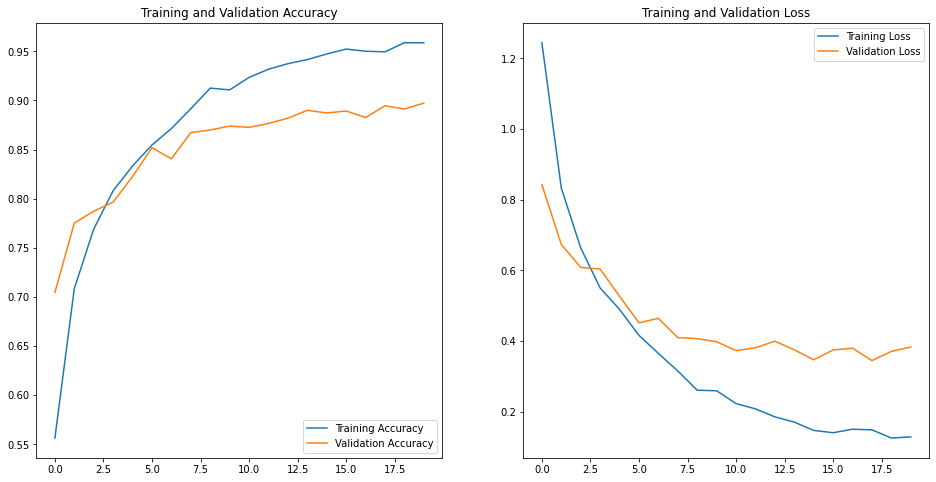

In [136]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [137]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('test set accuracy: ', test_accuracy)

79/79 [==============================] - 0s 2ms/step - loss: 593483.1250 - accuracy: 0.1393
test set accuracy:  0.13931144773960114


In [138]:
# test_prediction = np.argmax(model.predict(X_test1), axis=-1)
X = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
X_prediction = np.argmax(model.predict(X),axis=1)



array([5, 0, 0, 5, 0, 9, 3, 3, 7, 6, 9, 5, 4, 1, 8, 7, 8, 5, 8, 7, 9, 5,
       7, 4, 2, 3, 9, 3, 0, 8, 6, 0, 0, 1, 2, 8, 4, 6, 4, 5, 1, 7, 3, 9,
       7, 5, 2, 9, 2, 8, 7, 4, 5, 5, 1, 7, 7, 8, 6, 3, 0, 0, 3, 1, 4, 2,
       5, 1, 6, 6, 5, 9, 2, 2, 9, 4, 8, 9, 6, 9, 2, 4, 8, 4, 9, 8, 6, 2,
       7, 4, 2, 1, 2, 1, 9, 0, 4, 3, 1, 0, 0, 3, 6, 5, 5, 8, 6, 8, 4, 4,
       6, 4, 4, 6, 5, 5, 0, 1, 8, 0, 5, 5, 0, 5, 3, 3, 0, 4, 4, 2, 5, 3,
       1, 2, 0, 3, 0, 2, 1, 3, 0, 3, 5, 9, 7, 4, 5, 3, 2, 9, 8, 0, 1, 2,
       4, 8, 0, 2, 7, 8, 0, 7, 4, 9, 3, 0, 8, 5, 9, 1, 3, 5, 0, 6, 9, 5,
       1, 4, 3, 1, 0, 9, 5, 3, 5, 5, 3, 2, 9, 5, 8, 3, 0, 6, 9, 2, 9, 0,
       3, 2, 7, 6, 4, 4, 8, 1, 0, 1, 8, 6, 4, 9, 6, 8, 2, 8, 4, 2, 6, 1,
       3, 5, 4, 0, 2, 2, 4, 1, 3, 0, 5, 7, 2, 1, 7, 6, 2, 3, 8, 3, 9, 1,
       2, 9, 6, 1, 0, 2, 9, 4, 4, 7, 9, 1, 0, 7, 8, 5, 4, 6, 7, 8, 2, 4,
       4, 3, 1, 1, 9, 4, 0, 2, 9, 0, 5, 3, 7, 7, 0, 1, 1, 3, 3, 3, 9, 8,
       7, 6, 5, 3, 9, 5, 6, 8, 2, 2, 9, 6, 7, 8, 8,

In [139]:
df2 = pd.DataFrame(X_prediction)
df2.to_csv('submission.csv', index=True)